In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('DATASET_TQH.csv')    

HISTOGRAM TUỔI

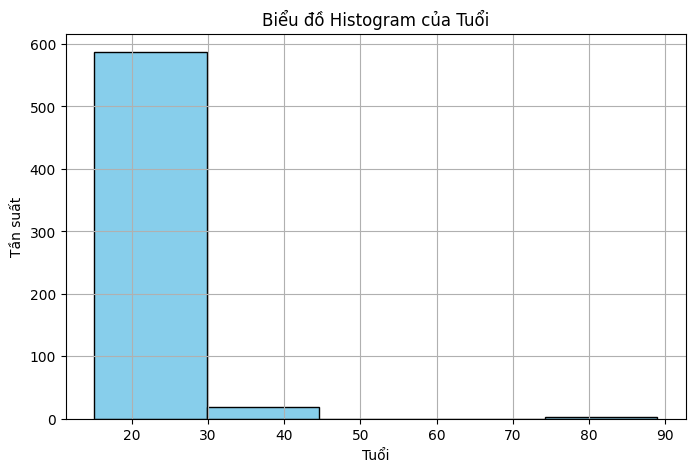

In [4]:
plt.figure(figsize=(8, 5))
plt.hist(df['Tuổi'], bins=5, color='skyblue', edgecolor='black')
plt.title('Biểu đồ Histogram của Tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()

In [5]:
# Tính toán tần suất và các khoảng tuổi
counts, bin_edges = np.histogram(df['Tuổi'], bins=5)

# In ra kết quả
for i in range(len(counts)):
    print(f"Khoảng tuổi {int(bin_edges[i])} - {int(bin_edges[i+1])}: {counts[i]} người")

Khoảng tuổi 15 - 29: 587 người
Khoảng tuổi 29 - 44: 19 người
Khoảng tuổi 44 - 59: 0 người
Khoảng tuổi 59 - 74: 0 người
Khoảng tuổi 74 - 89: 2 người


- Tập trung vào một vài khoảng tuổi nhất định:
Dữ liệu có xu hướng tập trung nhiều ở 1 hoặc 2 khoảng tuổi, thể hiện qua các cột cao hơn hẳn so với các khoảng còn lại.

- Phân bố không đều:
Biểu đồ cho thấy rằng độ tuổi không phân bố đều — một số khoảng có rất ít người hoặc gần như không có, trong khi một vài khoảng lại có tần suất cao.

-> Điều này cho thấy dữ liệu khảo sát bị lệch về độ tuổi, tức là tập trung mạnh vào một nhóm tuổi nhất định

- Việc nhóm tuổi từ 15 - 29 chiếm ưu thế có thể cho thấy:

-> Trầm cảm có xu hướng cao hơn ở người trẻ, nhất là sinh viên – đối tượng thường chịu áp lực học hành, tài chính và thiếu hỗ trợ tâm lý.

HISTOGRAM THỜI GIAN NGỦ

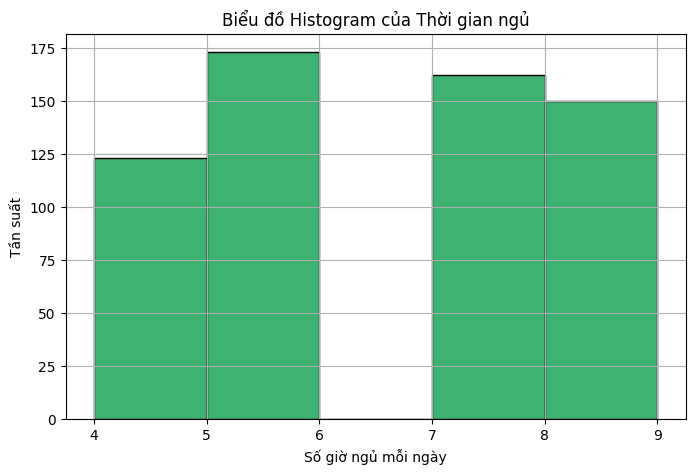

In [6]:
plt.figure(figsize=(8, 5))
plt.hist(df['Thời gian ngủ'], bins=5, color='mediumseagreen', edgecolor='black')
plt.title('Biểu đồ Histogram của Thời gian ngủ')
plt.xlabel('Số giờ ngủ mỗi ngày')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()

In [7]:
# Tính toán tần suất và các khoảng tuổi
counts1, bin_edges1 = np.histogram(df['Thời gian ngủ'], bins=5)

# In ra kết quả
for i in range(len(counts)):
    print(f"Khoảng thời gian ngủ {int(bin_edges1[i])} - {int(bin_edges1[i+1])}: {counts1[i]} người")

Khoảng thời gian ngủ 4 - 5: 123 người
Khoảng thời gian ngủ 5 - 6: 173 người
Khoảng thời gian ngủ 6 - 7: 0 người
Khoảng thời gian ngủ 7 - 8: 162 người
Khoảng thời gian ngủ 8 - 9: 150 người


In [8]:
df['Thời gian ngủ'].unique()

array([4. , 9. , 5.5, 7.5])

1. Nhóm người ngủ <6h chiếm tỉ lệ cao:  
- Tổng số người ngủ từ 4 - 6h là 296 người, chiếm tỉ lệ lớn nhất trong toàn bộ dữ liệu.
- Đây chính là dấu hiệu cảnh báo: ngủ ít (<6h) thường liên quan đến rối loạn giấc ngủ, căng thẳng, trầm cảm.  
2. Có 0 người ở trong khoảng ngủ bình thường (6h - 7h):
- Có thể do dữ liệu chưa được làm tròn hoặc thu thập không đồng đều, điều này cần được kiểm tra lại nếu muốn có độ chính xác cao
3. Nhóm ngủ từ 7-9 giờ:
- Có đến 312 người.
- Tương đương với nhóm ngủ ít, cho thấy có 2 cực ở trong tập dữ liệu này:  
-> Nhóm ngủ ít (Có thể stress, mất ngủ)  
-> Nhóm ngủ đủ (Có thể có lối sống lành mạnh hơn)  


BIỂU ĐỒ HISTOGRAM ÁP LỰC TÀI CHÍNH, MỨC ĐỘ CẢM THẤY CÔ ĐƠN, MỨC ĐỘ CĂNG THẲNG, MỨC ĐỘ LO ÂU

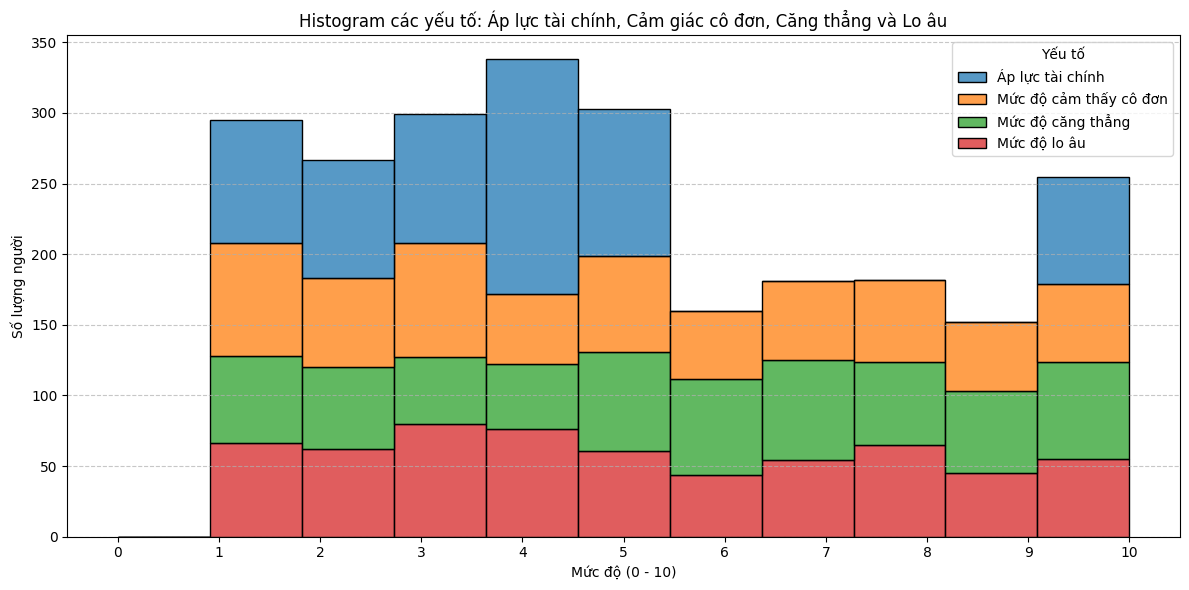

In [9]:
# Chọn các cột liên quan
cols = ['Áp lực tài chính', 'Mức độ cảm thấy cô đơn', 'Mức độ căng thẳng', 'Mức độ lo âu']

# Đặt kích thước biểu đồ
plt.figure(figsize=(12, 6))

# Chuyển đổi dữ liệu sang định dạng "long" để dễ vẽ bằng seaborn
df_melted = df[cols].melt(var_name='Yếu tố', value_name='Mức độ')

# Vẽ histogram
sns.histplot(data=df_melted, x='Mức độ', hue='Yếu tố', multiple='stack', binrange=(0, 10), bins=11)

# Tùy chỉnh biểu đồ
plt.title('Histogram các yếu tố: Áp lực tài chính, Cảm giác cô đơn, Căng thẳng và Lo âu')
plt.xlabel('Mức độ (0 - 10)')
plt.ylabel('Số lượng người')
plt.xticks(range(0, 11))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


1. Cảm giác cô đơn và căng thẳng là hai yếu tố có mức độ cao nổi bật.   
- Nhiều người có mức cô đơn từ 7 - 10, đặc biệt là mức 9 - 10
- Căng thẳng tập trung ở mức cao, đặc biệt là từ 7 trở lên
2. Lo âu phân bố khá đều, nhưng vẫn nghiêng về mức trung bình cao (4 - 7)  

3. Áp lực tài chính ít nghiêng về mức cao hơn so với các yếu tố còn lại, nhưng vẫn có một số người cảm thấy áp lực rõ rệt (4 - 6)  

4. Cảm giác cô đơn  
- Đây là yếu tố có mức độ cao nhất trong dữ liệu. Rất nhiều người rơi vào mức 8–10, đặc biệt mức 10 xuất hiện nhiều.

5. Căng thẳng
- Mức độ căng thẳng khá cao, đỉnh ở mức 7–9.

6. KL
- Tình trạng cô đơn và căng thẳng là nghiêm trọng và phổ biến.
- Lo âu đang phát triển trong một bộ phận lớn, có thể trở thành vấn đề nếu không kiểm soát sớm.
- Áp lực tài chính tuy không nổi bật nhất, nhưng không thể bỏ qua vì nó có thể là "giọt nước tràn ly" nếu kết hợp với các yếu tố khác

BOXPLOT TUỔI VS TRẦM CẢM

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4816\887671269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Mức độ trầm cảm', y='Tuổi', palette='Set2')


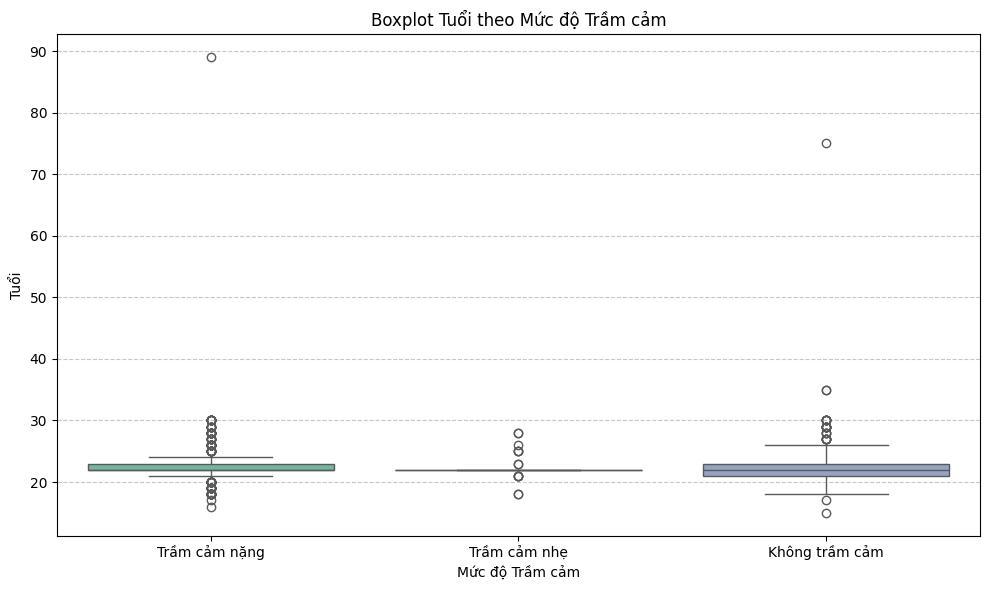

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Mức độ trầm cảm', y='Tuổi', palette='Set2')

plt.title('Boxplot Tuổi theo Mức độ Trầm cảm')
plt.xlabel('Mức độ Trầm cảm')
plt.ylabel('Tuổi')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

1. Không trầm cảm  
- Tuổi trung bình thấp hơn một chút so với các nhóm trầm cảm
- Nhóm này tập trung trong độ tuổi 21 - 24
- Phân bố hẹp, cho thấy sự ổn định trong nhóm này.


2. Trầm cảm nhẹ và trầm cảm nặng  
- Tuổi trung bình có xu hướng cao hơn so với nhóm không trầm cảm.
- Trầm cảm nặng có nhiều cá nhân ở độ tuổi 25–26.

3. Trầm cảm nhẹ  
- Có sự phân tán rộng hơn, cho thấy nhóm này đang bắt đầu cảm nhận rõ áp lực từ cuộc sống, tài chính, hoặc trách nhiệm xã hội.

4. Trầm cảm nặng  
- Sự phân tán lớn cho thấy trầm cảm nặng xuất hiện ở nhiều độ tuổi khác nhau, không chỉ người lớn hơn mà có thể cả người trẻ gặp nhiều áp lực liên tục không giải tỏa được.

5. Phân bố tuổi trong các nhóm khá đồng đều, nhưng độ lệch (range) ở nhóm trầm cảm nhẹ và nặng rộng hơn, cho thấy trải nghiệm trầm cảm xuất hiện trong nhiều độ tuổi hơn.  
- Tuổi càng cao, nguy cơ trầm cảm nhẹ hoặc nặng càng tăng nhẹ.
- Không có sự phân biệt quá rõ rệt về tuổi giữa các nhóm, nhưng xu hướng là: người lớn tuổi hơn thường trải nghiệm trầm cảm nặng hơn




In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Giới tính                             608 non-null    object 
 1   Tuổi                                  608 non-null    int64  
 2   Thời gian học/ làm việc/ ngày         608 non-null    object 
 3   Thời gian ngủ                         608 non-null    float64
 4   Chất lượng ngủ                        608 non-null    object 
 5   Thói quen ăn uống                     608 non-null    object 
 6   Áp lực tài chính                      608 non-null    int64  
 7   Tiền sử bệnh tâm thần trong gia đình  608 non-null    int64  
 8   Từng có ý nghĩ tự tử không?           608 non-null    int64  
 9   Mức độ cảm thấy cô đơn                608 non-null    int64  
 10  Mức độ căng thẳng                     608 non-null    int64  
 11  Mức độ lo âu       

STACKED BAR THÓI QUEN ĂN UỐNG VS TRẦM CẢM

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Không lành mạnh'),
  Text(1, 0, 'Vừa phải'),
  Text(2, 0, 'Khỏe mạnh'),
  Text(3, 0, 'Khác')])

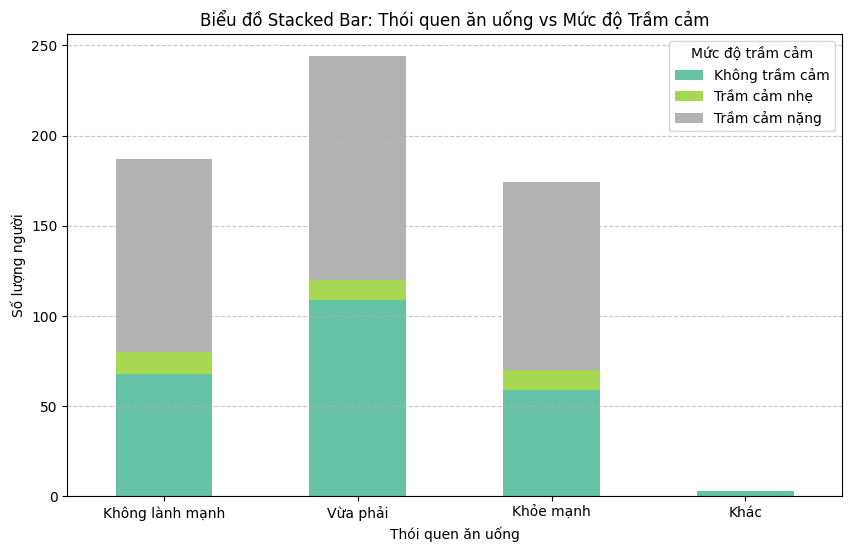

In [12]:
order = ['Không lành mạnh', 'Vừa phải', 'Khỏe mạnh', 'Khác']

# Đảm bảo rằng các giá trị không thuộc danh sách sẽ được gán là 'Khác'
df['Thói quen ăn uống'] = df['Thói quen ăn uống'].where(df['Thói quen ăn uống'].isin(order), 'Khác')

# Gộp dữ liệu theo thứ tự mong muốn
stacked_data_ordered = df.groupby(['Thói quen ăn uống', 'Mức độ trầm cảm']).size().unstack(fill_value=0)
stacked_data_ordered = stacked_data_ordered.reindex(order)

# Vẽ biểu đồ stacked bar theo thứ tự mong muốn
stacked_data_ordered.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Tùy chỉnh biểu đồ
plt.title('Biểu đồ Stacked Bar: Thói quen ăn uống vs Mức độ Trầm cảm')
plt.xlabel('Thói quen ăn uống')
plt.ylabel('Số lượng người')
plt.legend(title='Mức độ trầm cảm')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

Nhận xét theo từng nhóm:  
- Khỏe mạnh:  

Chủ yếu nằm trong nhóm "Không trầm cảm" và "Trầm cảm nhẹ".  

Rất ít trường hợp trầm cảm nặng → cho thấy ăn uống lành mạnh có thể liên quan đến sức khỏe tâm thần tốt hơn.  

- Vừa phải:  

Phân bố đồng đều hơn giữa các mức trầm cảm.  

Tuy nhiên, số lượng người "Trầm cảm nhẹ" và "Trầm cảm nặng" tăng lên rõ rệt → nhóm này dễ bị ảnh hưởng khi không giữ thói quen ổn định.  

- Không lành mạnh:  

Tỷ lệ "Trầm cảm nặng" cao nhất trong ba nhóm.  

Điều này cho thấy ăn uống không lành mạnh có liên hệ chặt chẽ với trầm cảm nặng.  

In [13]:
df['Tuổi'].unique()

array([21, 26, 22, 29, 28, 19, 23, 18, 27, 30, 20, 25, 24, 35, 89, 15, 16,
       17, 75])

In [14]:
df['Tuổi'].value_counts()

Tuổi
22    307
20     48
21     34
18     33
23     31
26     27
25     25
19     19
28     18
30     17
29     15
27     13
24     13
35      2
17      2
89      1
15      1
16      1
75      1
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

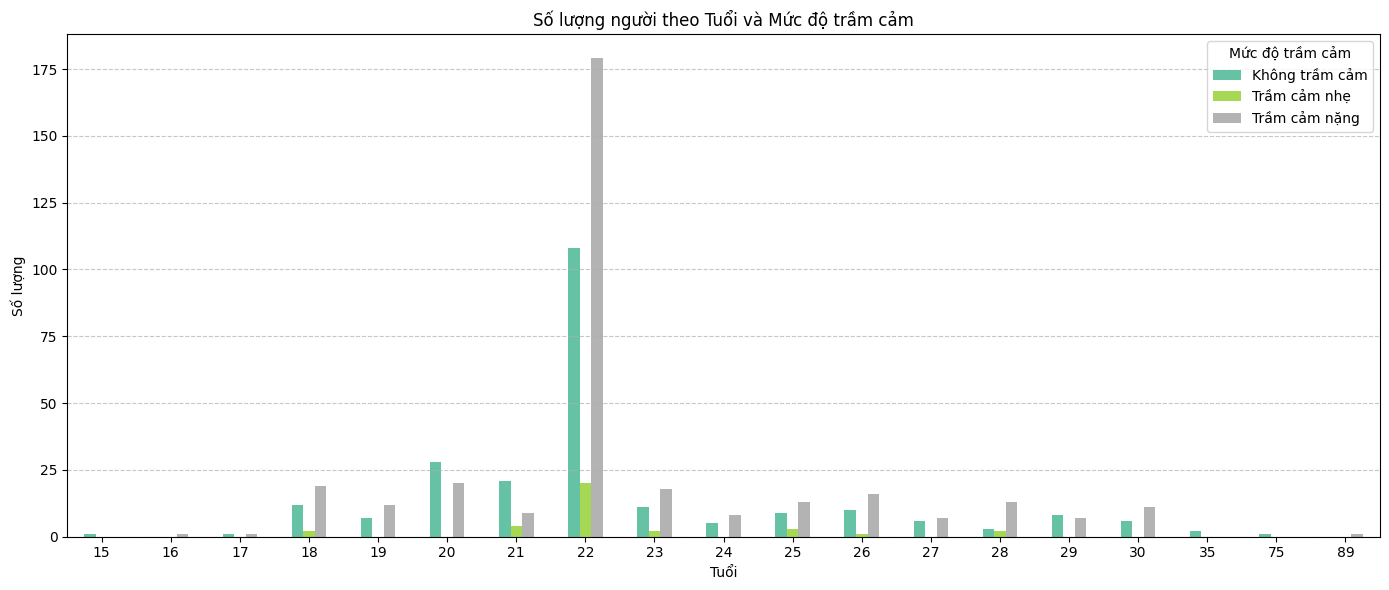

In [15]:
age_depression_counts = df.groupby(['Tuổi', 'Mức độ trầm cảm']).size().unstack(fill_value=0)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
age_depression_counts.plot(kind='bar', stacked=False, colormap='Set2', figsize=(14, 6))
plt.title('Số lượng người theo Tuổi và Mức độ trầm cảm')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng')
plt.legend(title='Mức độ trầm cảm')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

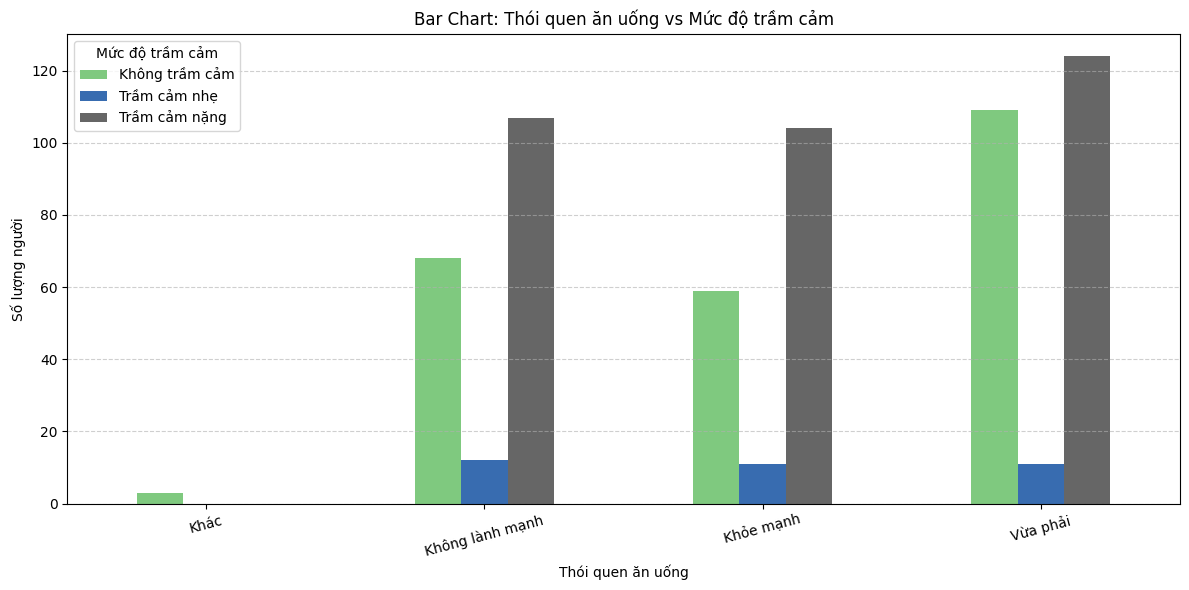

In [16]:
eating_depression_counts = df.groupby(['Thói quen ăn uống', 'Mức độ trầm cảm']).size().unstack(fill_value=0)

# Vẽ biểu đồ cột thường (không stacked)
plt.figure(figsize=(12, 6))
eating_depression_counts.plot(kind='bar', colormap='Accent', figsize=(12, 6))
plt.title('Bar Chart: Thói quen ăn uống vs Mức độ trầm cảm')
plt.xlabel('Thói quen ăn uống')
plt.ylabel('Số lượng người')
plt.legend(title='Mức độ trầm cảm')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4816\2912548684.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped, x="Mức độ trầm cảm", y="Số lượng", hue="Giới tính", ci=None)


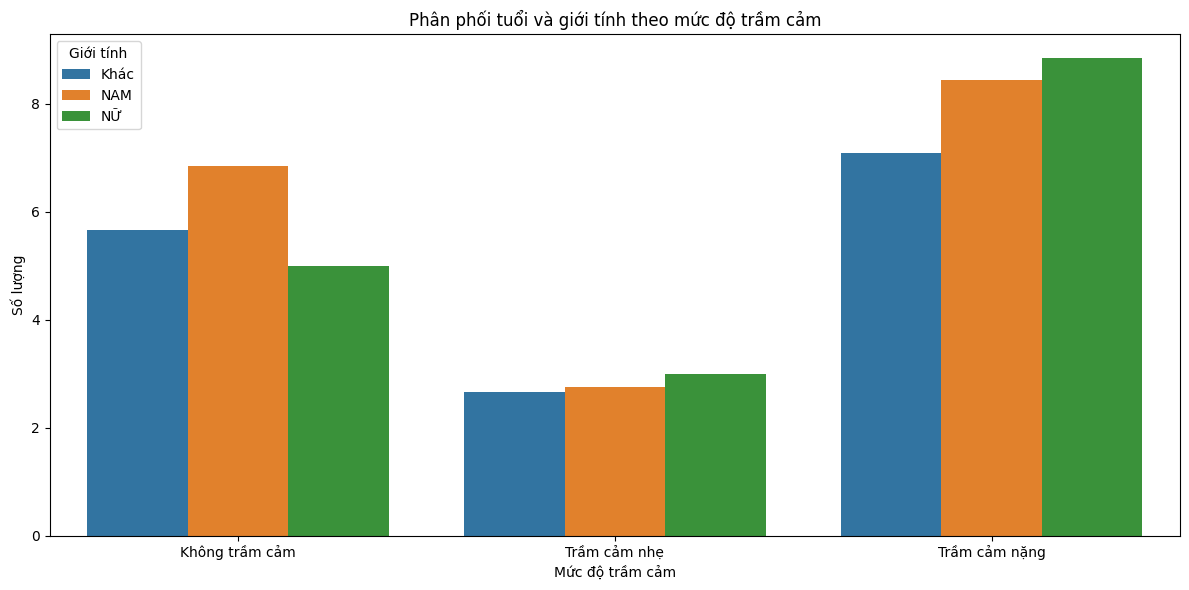

In [17]:
grouped = df.groupby(["Mức độ trầm cảm", "Giới tính", "Tuổi"]).size().reset_index(name="Số lượng")

# Vẽ biểu đồ cột kết hợp
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x="Mức độ trầm cảm", y="Số lượng", hue="Giới tính", ci=None)

plt.title("Phân phối tuổi và giới tính theo mức độ trầm cảm")
plt.xlabel("Mức độ trầm cảm")
plt.ylabel("Số lượng")
plt.legend(title="Giới tính")
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4816\454867200.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age_gender = df.groupby(["Mức độ trầm cảm", "Giới tính", "Nhóm tuổi"]).size().reset_index(name="Số lượng")


<Figure size 1400x700 with 0 Axes>

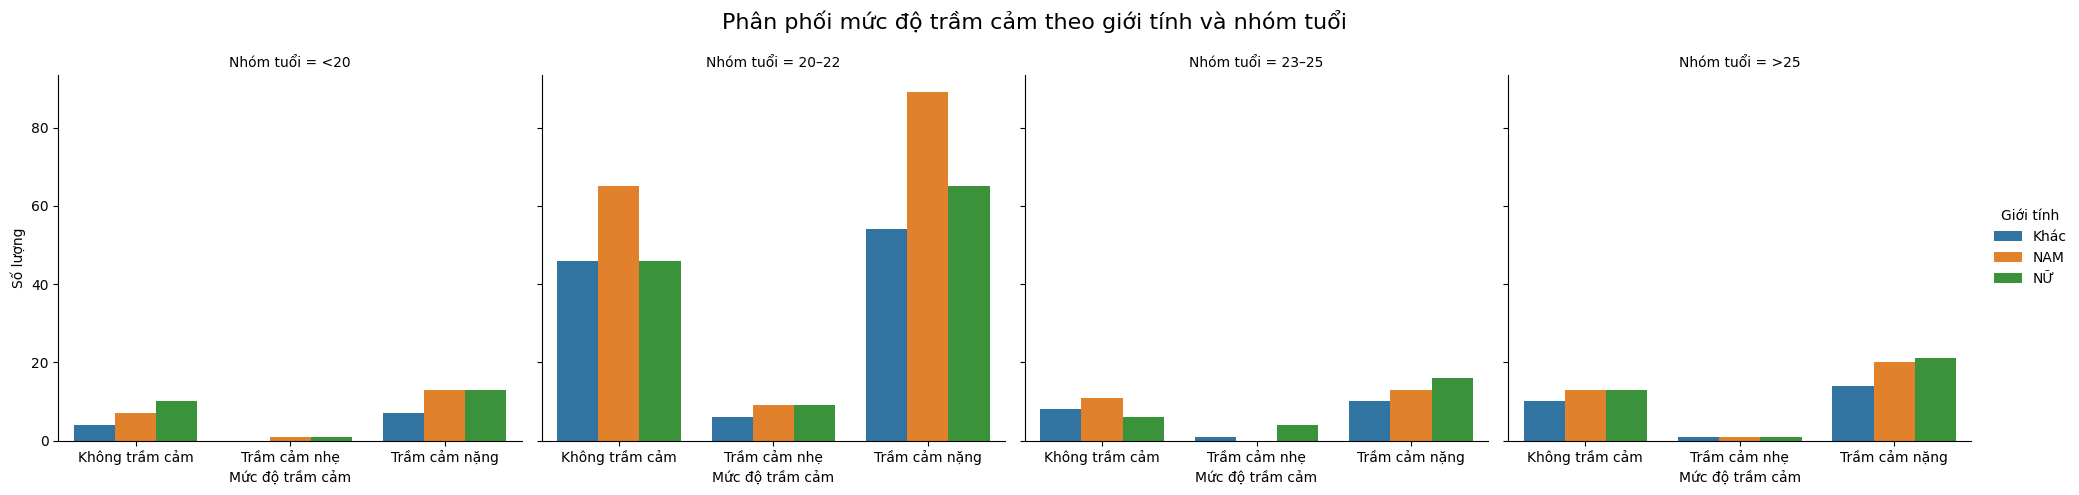

In [18]:
# Tạo nhóm tuổi
bins = [0, 19, 22, 25, 100]
labels = ['<20', '20–22', '23–25', '>25']
df["Nhóm tuổi"] = pd.cut(df["Tuổi"], bins=bins, labels=labels)

# Nhóm dữ liệu theo mức độ trầm cảm, giới tính và nhóm tuổi
grouped_age_gender = df.groupby(["Mức độ trầm cảm", "Giới tính", "Nhóm tuổi"]).size().reset_index(name="Số lượng")

# Vẽ biểu đồ cột phân nhóm
plt.figure(figsize=(14, 7))
sns.catplot(
    data=grouped_age_gender,
    x="Mức độ trầm cảm",
    y="Số lượng",
    hue="Giới tính",
    col="Nhóm tuổi",
    kind="bar",
    height=5,
    aspect=1
)

plt.subplots_adjust(top=0.85)
plt.suptitle("Phân phối mức độ trầm cảm theo giới tính và nhóm tuổi", fontsize=16)
plt.show()

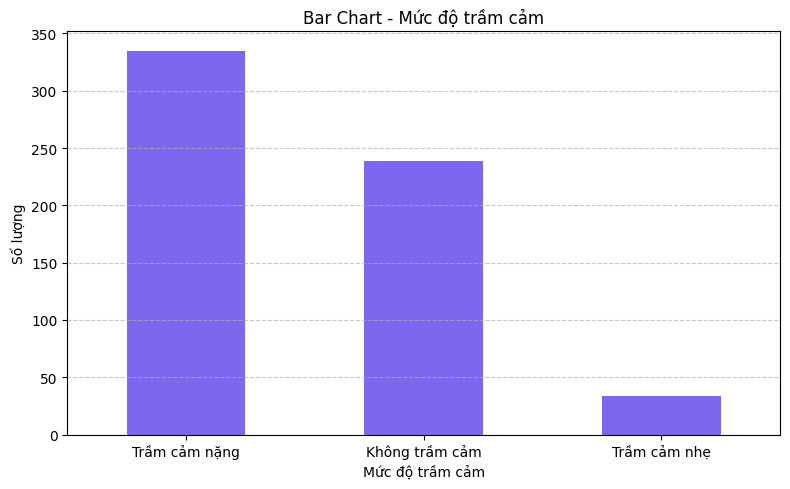

In [19]:

# # Đếm số lượng từng giới tính
# gender_counts = df["Giới tính"].value_counts()

# # Tạo bar chart
# plt.figure(figsize=(12, 5))

# plt.subplot(1, 2, 1)
# gender_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
# plt.title('Bar Chart - Phân bố giới tính')
# plt.xlabel('Giới tính')
# plt.ylabel('Số lượng')
# plt.xticks(rotation=0)

# # Tạo pie chart
# plt.subplot(1, 2, 2)
# gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
# plt.title('Pie Chart - Phân bố giới tính')
# plt.ylabel('')

# plt.tight_layout()
# plt.show()

# sleep_quality_counts = df["Chất lượng ngủ"].value_counts()

# # Vẽ biểu đồ cột
# plt.figure(figsize=(8, 5))
# sleep_quality_counts.plot(kind='bar', color='mediumslateblue')
# plt.title('Bar Chart - Phân bố Chất lượng ngủ')
# plt.xlabel('Chất lượng ngủ')
# plt.ylabel('Số lượng')
# plt.xticks(rotation=0)
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# plt.tight_layout()
# plt.show()

# eat_counts = df["Thói quen ăn uống"].value_counts()
# plt.figure(figsize=(8, 5))
# eat_counts.plot(kind='bar', color='mediumslateblue')
# plt.title('Bar Chart - Thói quen ăn uống')
# plt.xlabel('Thói quen ăn uống')
# plt.ylabel('Số lượng')
# plt.xticks(rotation=0)
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# plt.tight_layout()
# plt.show()

TC_counts = df["Mức độ trầm cảm"].value_counts()
plt.figure(figsize=(8, 5))
TC_counts.plot(kind='bar', color='mediumslateblue')
plt.title('Bar Chart - Mức độ trầm cảm')
plt.xlabel('Mức độ trầm cảm')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Biểu đồ boxplot: Áp lực tài chính với Mức độ trầm cảm

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4816\2996734033.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Mức độ trầm cảm',y='Áp lực tài chính',palette='Set2')


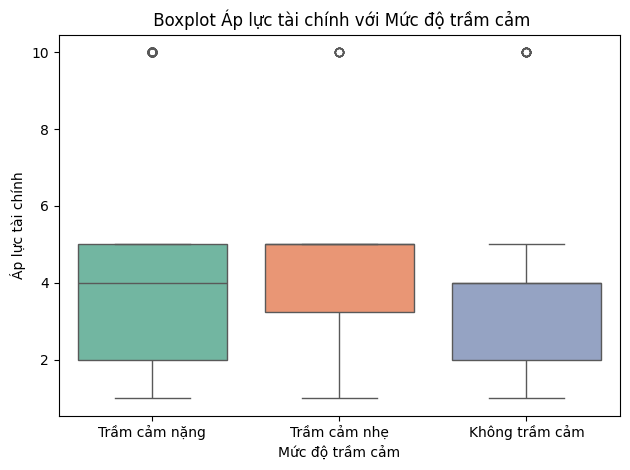

In [20]:
sns.boxplot(data=df,x='Mức độ trầm cảm',y='Áp lực tài chính',palette='Set2')
plt.title(" Boxplot Áp lực tài chính với Mức độ trầm cảm")
plt.xlabel("Mức độ trầm cảm")
plt.ylabel("Áp lực tài chính")
plt.tight_layout()
plt.show()

NHẬN XÉT:
- Trầm cảm nặng: Median: 4 áp lực tài chính cao; outlier = 10, một số cá nhân trong nhóm chịu áp lực cực cao; Nhóm này chịu áp lực tài chính cao nhất
- Trầm cảm nhẹ: cũng chịu áp lực tài chính tương đối cao gần ngang trầm cảm nặng
- Không trầm cảm: trung vị thấp hơn, nhóm này có mức áp lực tài chính thấp hơn và ổn định hơn

In [21]:
# df[df['Mức độ trầm cảm']=='Trầm cảm nhẹ']['Áp lực tài chính'].quantile(0.5)
df[df['Mức độ trầm cảm']=='Không trầm cảm']['Áp lực tài chính'].quantile(0.5)

np.float64(4.0)

Biểu đồ Boxplot: Thời gian ngủ và Mức độ trầm cảm

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4816\3883554867.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Mức độ trầm cảm',y='Thời gian ngủ',palette='Set2')


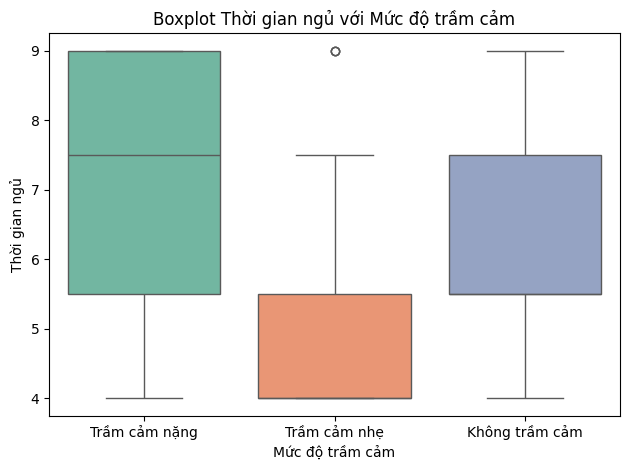

Mức độ trầm cảm
Không trầm cảm    6.608787
Trầm cảm nhẹ      5.073529
Trầm cảm nặng     6.735821
Name: Thời gian ngủ, dtype: float64

In [22]:
sns.boxplot(data=df,x='Mức độ trầm cảm',y='Thời gian ngủ',palette='Set2')
plt.title("Boxplot Thời gian ngủ với Mức độ trầm cảm")
plt.xlabel("Mức độ trầm cảm")
plt.ylabel("Thời gian ngủ")
group_means = df.groupby('Mức độ trầm cảm')['Thời gian ngủ'].mean()
plt.tight_layout()
plt.show()
group_means

In [23]:
df[df['Mức độ trầm cảm']=='Không trầm cảm']['Thời gian ngủ'].quantile(0.5)
df[df['Mức độ trầm cảm']=='Trầm cảm nhẹ']['Thời gian ngủ'].quantile(0.5)

np.float64(4.0)

NHẬN XÉT
- Người bị trầm cảm nặng: Median: 7.5, Ngủ nhiều hơn nhưng có thể là ngủ quá nhiều nhưng không chất lượng do rối loạn nhịp sinh học 
- Trầm cảm nhẹ: Median: 4, Ngủ rất ít có thể liên quan đến lo âu
- Không trầm cảm: Median: 5.5, Giấc ngủ tương đối chuẩn và ổn định hơn hẳn

Giới tính với Mức độ trầm cảm

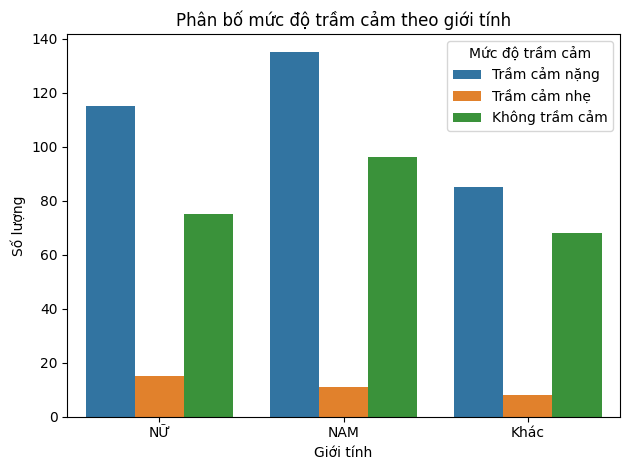

In [24]:
sns.countplot(data=df,x='Giới tính',hue='Mức độ trầm cảm')
plt.title("Phân bố mức độ trầm cảm theo giới tính")
plt.xlabel("Giới tính")
plt.ylabel("Số lượng")
plt.legend(title="Mức độ trầm cảm")
plt.tight_layout()
plt.show()

NHẬN XÉT: 
- Trầm cảm nặng là phổ biến nhất, số lượng người cao nhất. Cho thấy vấn đề sức khỏe tâm thần nghiêm trọng phổ biến trong cả 3 nhóm  người
- Nam giới có số lượng người trầm cảm nặng cao nhất

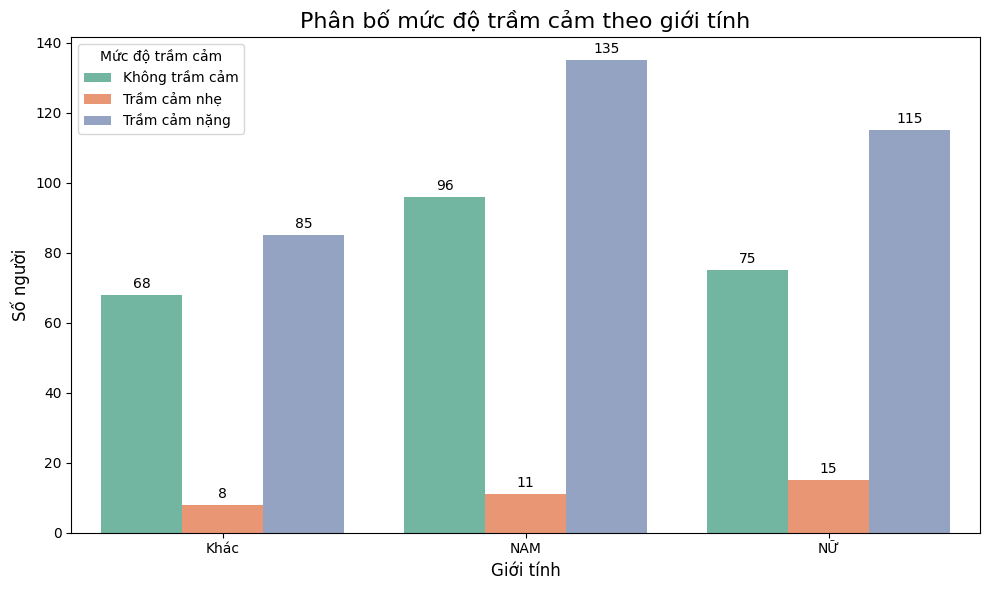

In [25]:
gender_depression_counts = df.groupby(['Giới tính', 'Mức độ trầm cảm']).size().reset_index(name='Số lượng')

# Vẽ biểu đồ cột nhóm
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=gender_depression_counts, x='Giới tính', y='Số lượng', hue='Mức độ trầm cảm', palette='Set2')

# Trang trí
plt.title("Phân bố mức độ trầm cảm theo giới tính", fontsize=16)
plt.xlabel("Giới tính", fontsize=12)
plt.ylabel("Số người", fontsize=12)
plt.legend(title="Mức độ trầm cảm")
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.show()

CHẤT LƯỢNG NGỦ VỚI MỨC ĐỘ TRẦM CẢM

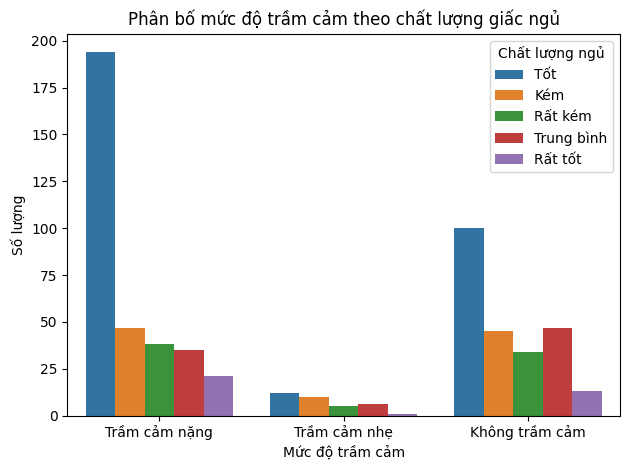

In [26]:
sns.countplot(data=df, x='Mức độ trầm cảm', hue='Chất lượng ngủ')

plt.title('Phân bố mức độ trầm cảm theo chất lượng giấc ngủ')
plt.xlabel('Mức độ trầm cảm')
plt.ylabel('Số lượng')
plt.legend(title='Chất lượng ngủ')
plt.tight_layout()
plt.show()

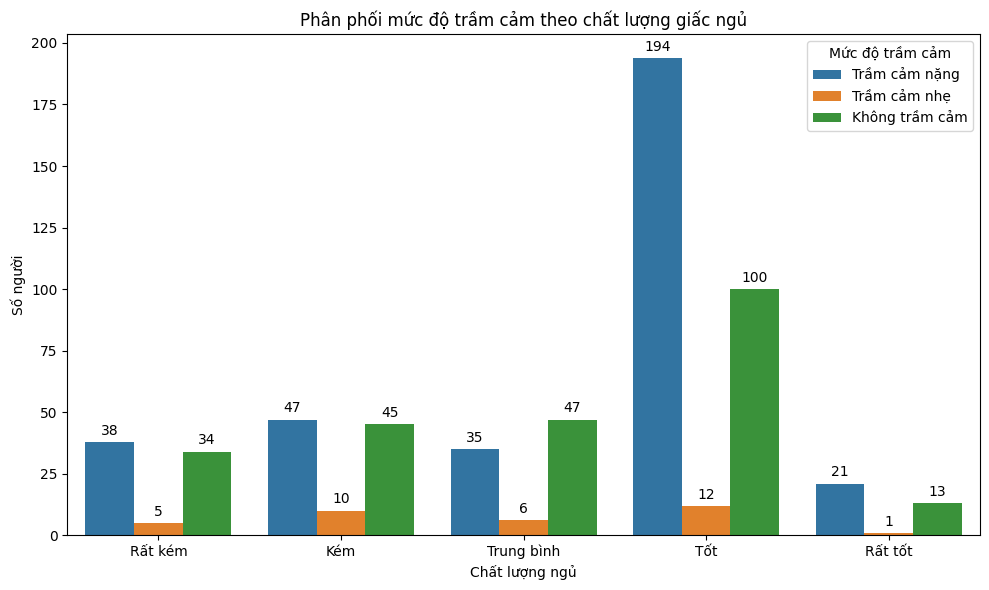

In [27]:
sleep_order = ["Rất kém", "Kém", "Trung bình", "Tốt", "Rất tốt"]
df["Chất lượng ngủ"] = pd.Categorical(df["Chất lượng ngủ"], categories=sleep_order, ordered=True)
plt.figure(figsize=(10, 6))
axit=sns.countplot(data=df, x="Chất lượng ngủ", hue="Mức độ trầm cảm")

# Thêm tiêu đề và nhãn
plt.title("Phân phối mức độ trầm cảm theo chất lượng giấc ngủ")
plt.xlabel("Chất lượng ngủ")
plt.ylabel("Số người")
plt.legend(title="Mức độ trầm cảm")
for container in axit.containers:
    axit.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.tight_layout()
plt.show()

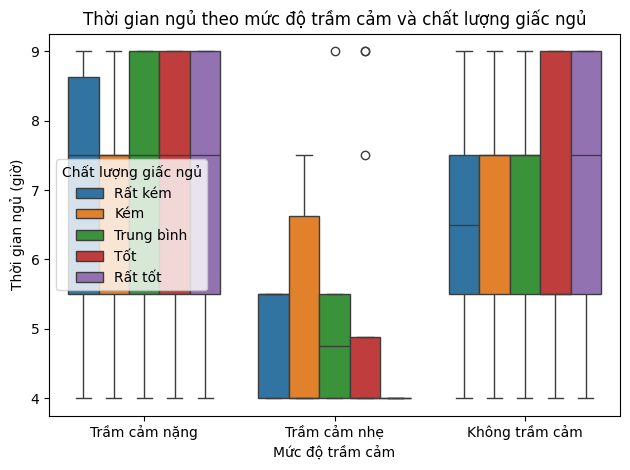

In [28]:
sns.boxplot(
    data=df, 
    x='Mức độ trầm cảm', 
    y='Thời gian ngủ', 
    hue='Chất lượng ngủ'
)
plt.title('Thời gian ngủ theo mức độ trầm cảm và chất lượng giấc ngủ')
plt.ylabel('Thời gian ngủ (giờ)')
plt.xlabel('Mức độ trầm cảm')
plt.legend(title='Chất lượng giấc ngủ')
plt.tight_layout()
plt.show()

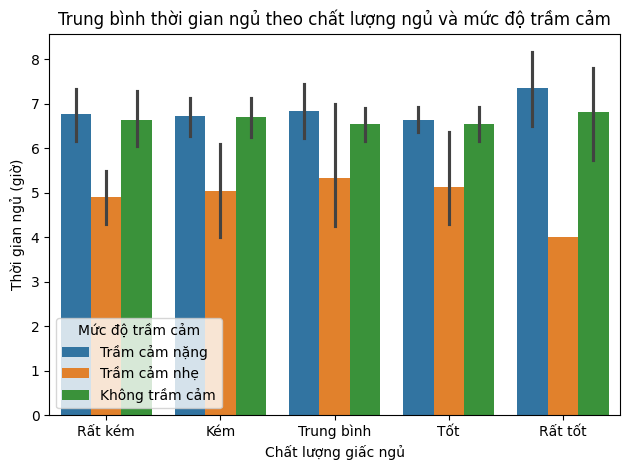

In [29]:
sns.barplot(
    data=df, 
    x='Chất lượng ngủ', 
    y='Thời gian ngủ', 
    hue='Mức độ trầm cảm'
)
plt.title('Trung bình thời gian ngủ theo chất lượng ngủ và mức độ trầm cảm')
plt.ylabel('Thời gian ngủ (giờ)')
plt.xlabel('Chất lượng giấc ngủ')
plt.legend(title='Mức độ trầm cảm')
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4816\1814052065.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['Thời gian ngủ', 'Chất lượng ngủ', 'Mức độ trầm cảm']).size().reset_index(name='Số lượng')


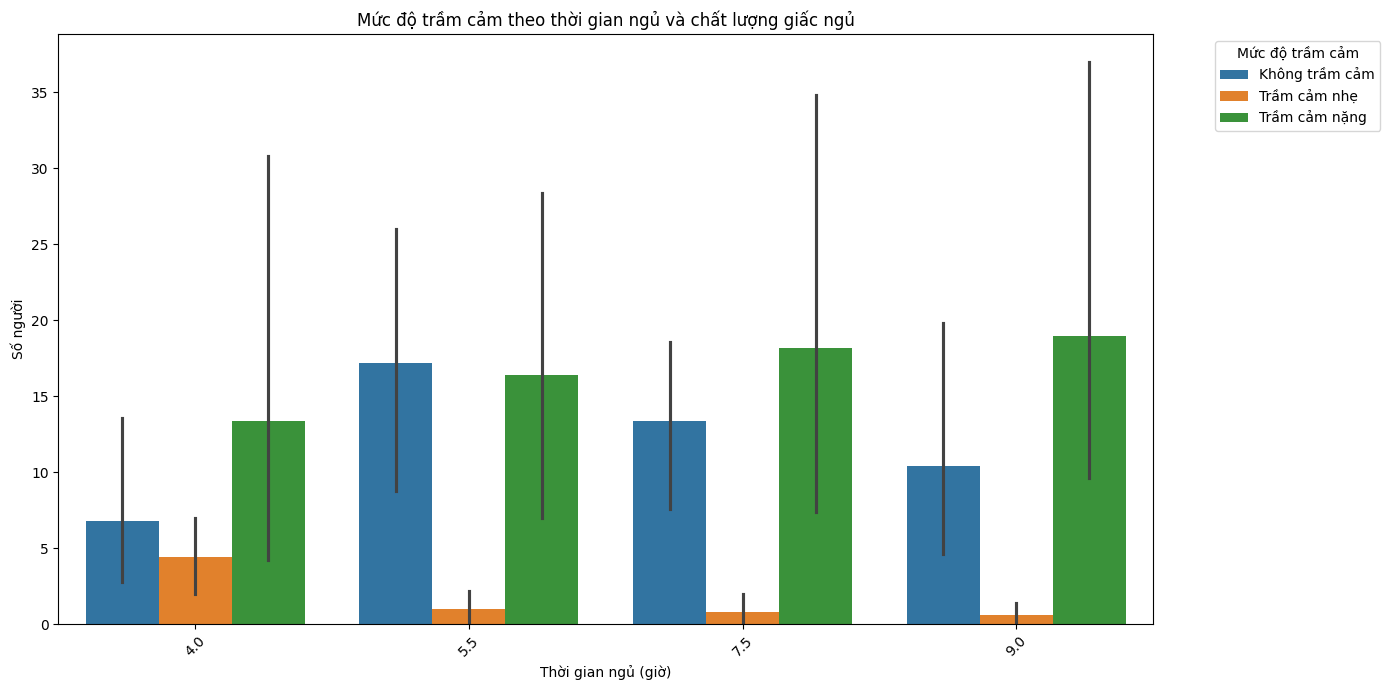

In [30]:
grouped_df = df.groupby(['Thời gian ngủ', 'Chất lượng ngủ', 'Mức độ trầm cảm']).size().reset_index(name='Số lượng')

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))
sns.barplot(data=grouped_df,
            x='Thời gian ngủ',
            y='Số lượng',
            hue='Mức độ trầm cảm')

plt.title('Mức độ trầm cảm theo thời gian ngủ và chất lượng giấc ngủ')
plt.xlabel('Thời gian ngủ (giờ)')
plt.ylabel('Số người')
plt.xticks(rotation=45)
plt.legend(title='Mức độ trầm cảm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

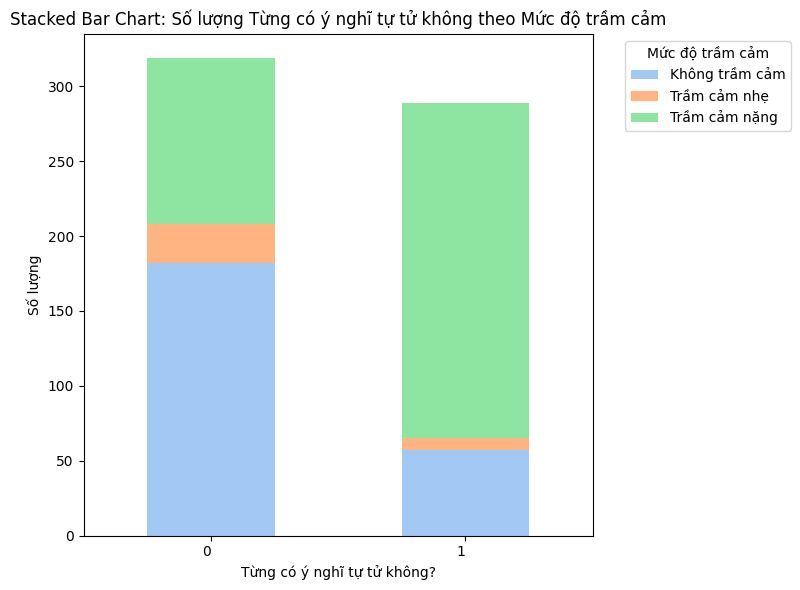

In [31]:
grouped = df.groupby(["Từng có ý nghĩ tự tử không?", "Mức độ trầm cảm"]).size().unstack(fill_value=0)


colors = sns.color_palette("pastel", n_colors=len(grouped.columns))

fig, ax = plt.subplots(figsize=(8, 6))
grouped.plot(kind='bar', stacked=True, color=colors, ax=ax)


ax.set_xlabel("Từng có ý nghĩ tự tử không?")
ax.set_ylabel("Số lượng")
ax.set_title("Stacked Bar Chart: Số lượng Từng có ý nghĩ tự tử không theo Mức độ trầm cảm")


for label in ax.get_xticklabels():
    label.set_rotation(0)           
    label.set_horizontalalignment('right')  


plt.legend(title="Mức độ trầm cảm", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()

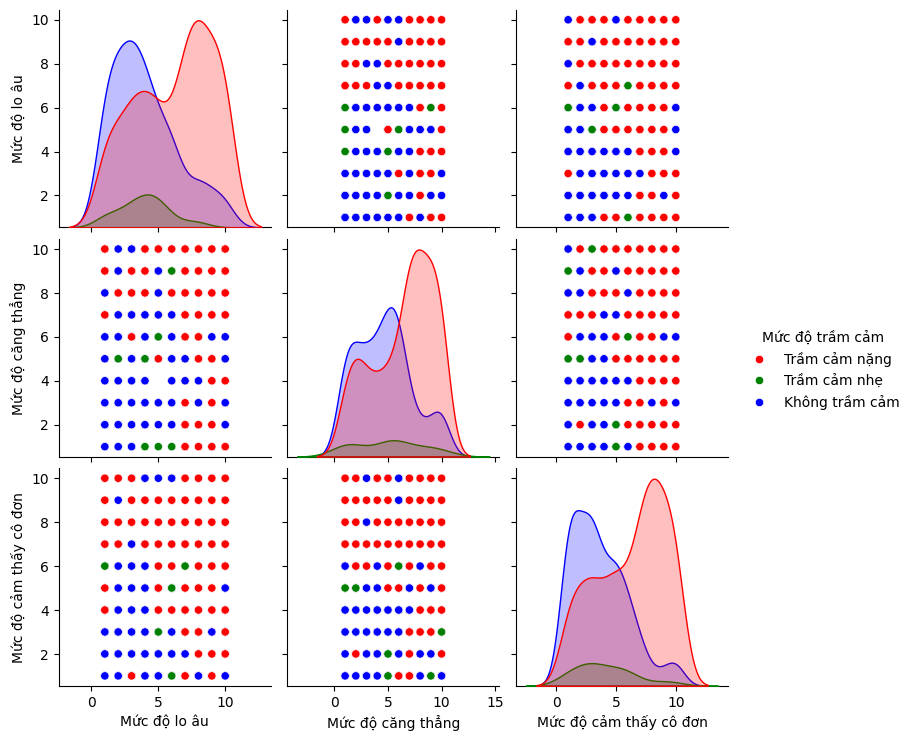

In [32]:
selected_features = ["Mức độ lo âu", "Mức độ căng thẳng", "Mức độ cảm thấy cô đơn", "Mức độ trầm cảm"]  

custom_palette = {"Trầm cảm nặng": "red", "Trầm cảm nhẹ": "green", "Không trầm cảm": "blue"}  


sns.pairplot(df[selected_features], diag_kind="kde", hue="Mức độ trầm cảm", palette=custom_palette)


plt.show()

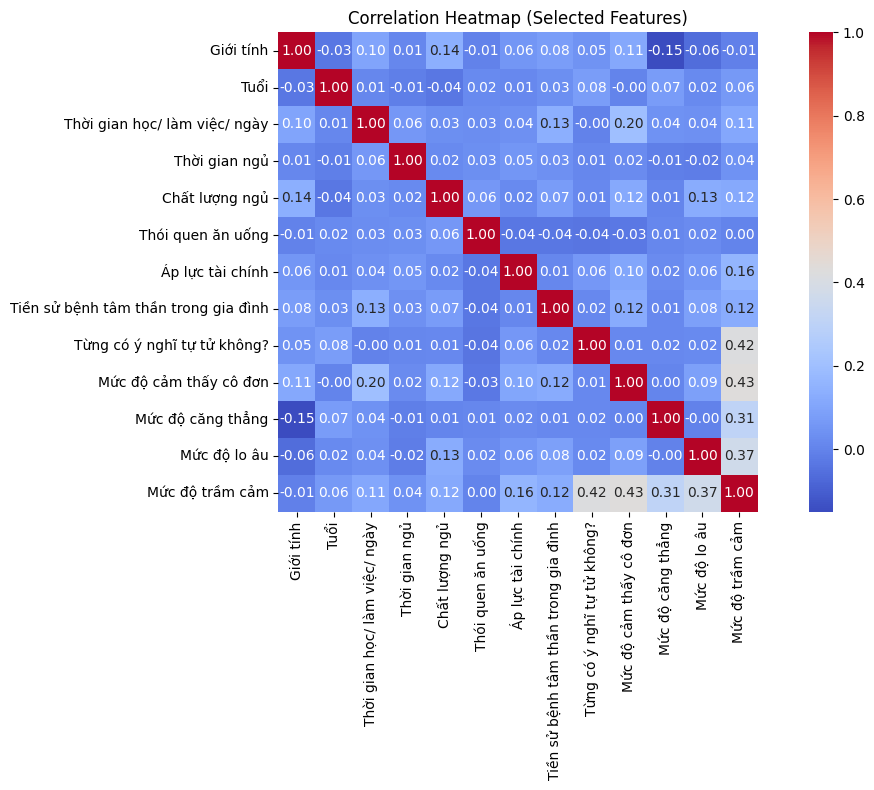

In [33]:
df_encode = pd.read_csv("data_encode.csv")  # Đọc dữ liệu đã được mã hóa
correlation_matrix = df_encode.corr()
selected_features = ["Giới tính","Tuổi","Thời gian học/ làm việc/ ngày","Thời gian ngủ" ,"Chất lượng ngủ" ,"Thói quen ăn uống","Áp lực tài chính","Tiền sử bệnh tâm thần trong gia đình","Từng có ý nghĩ tự tử không?","Mức độ cảm thấy cô đơn","Mức độ căng thẳng","Mức độ lo âu","Mức độ trầm cảm"]




subset = df_encode[selected_features]


corr_matrix = subset.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap (Selected Features)")
plt.tight_layout()
plt.show()

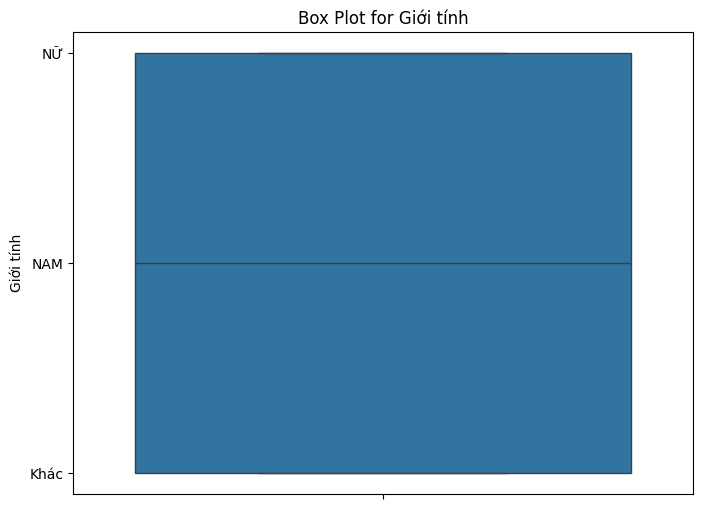

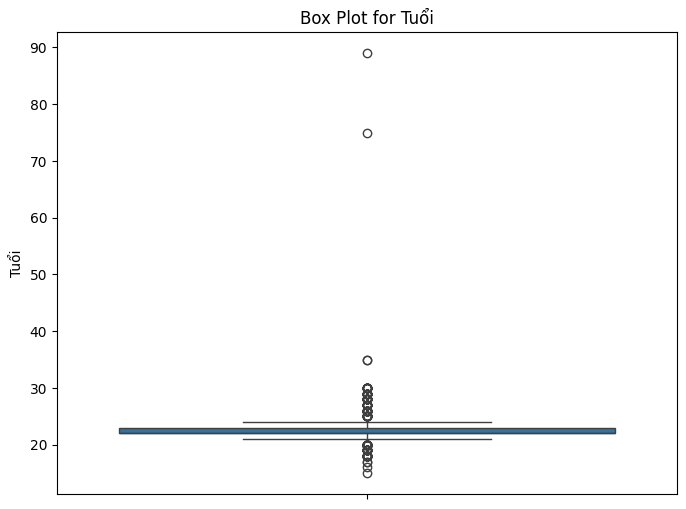

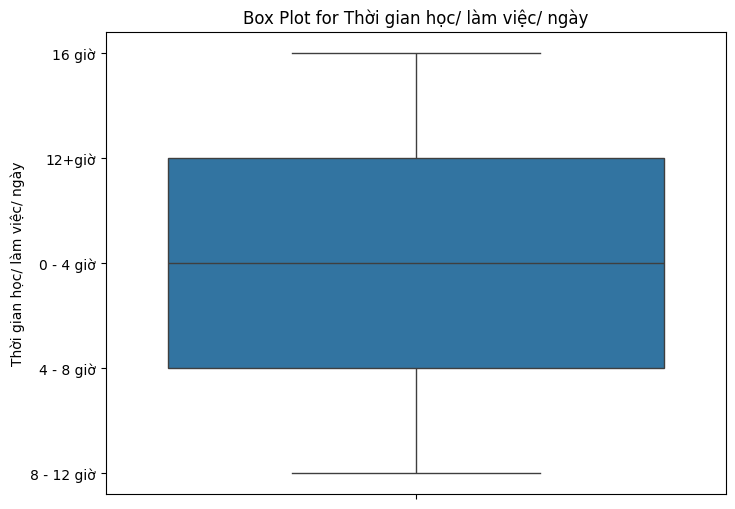

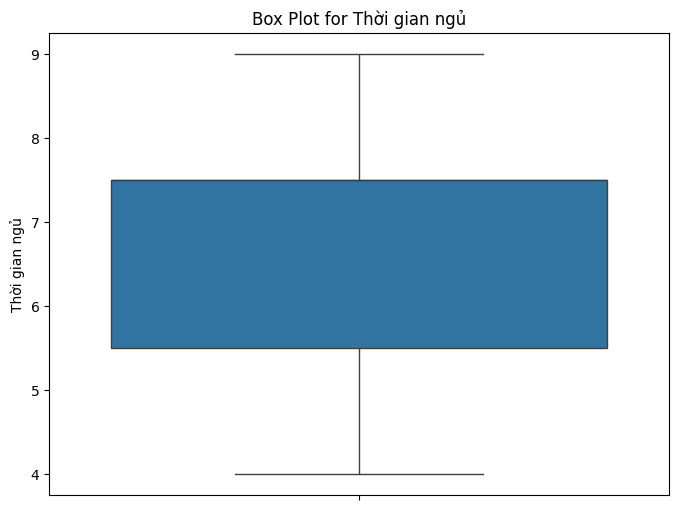

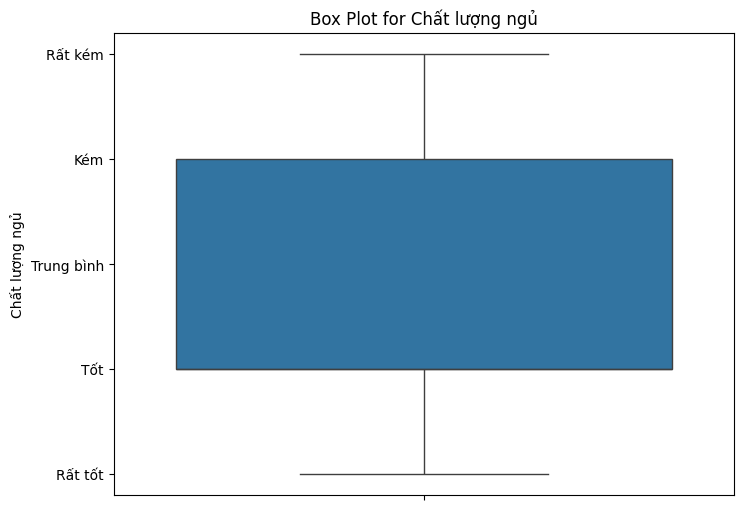

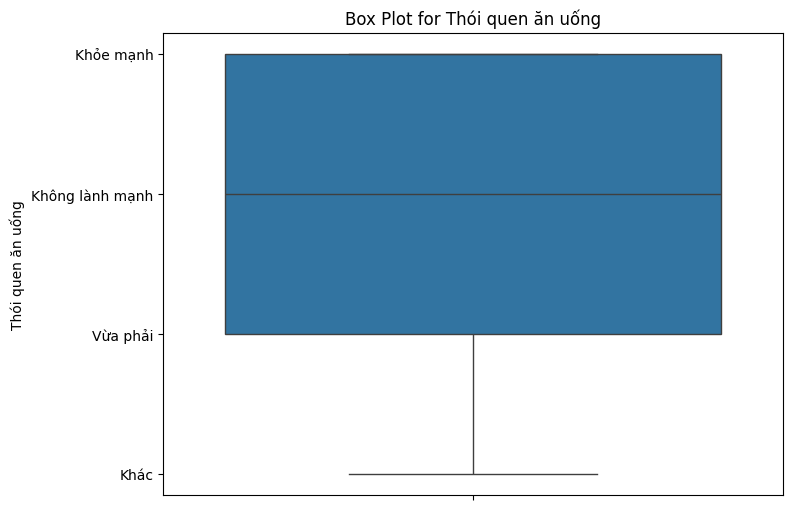

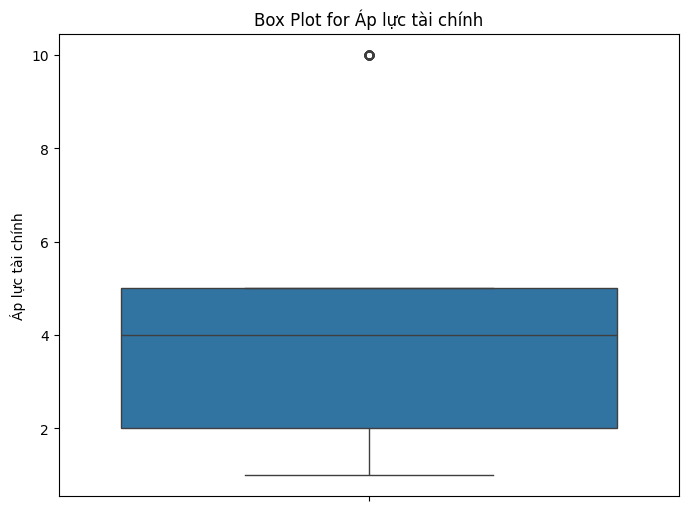

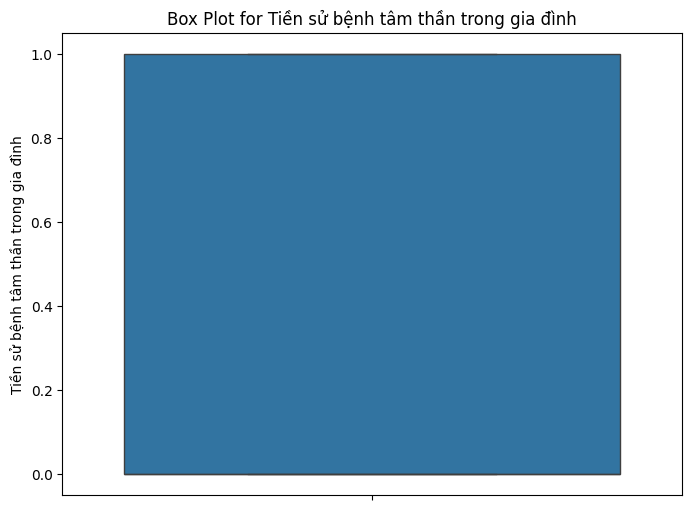

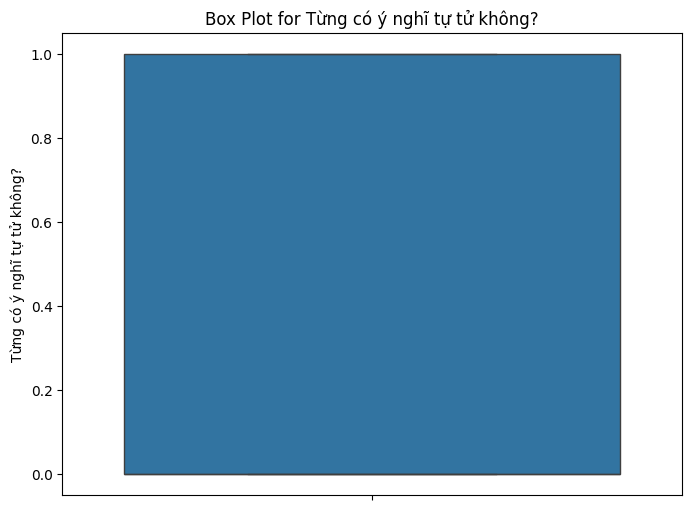

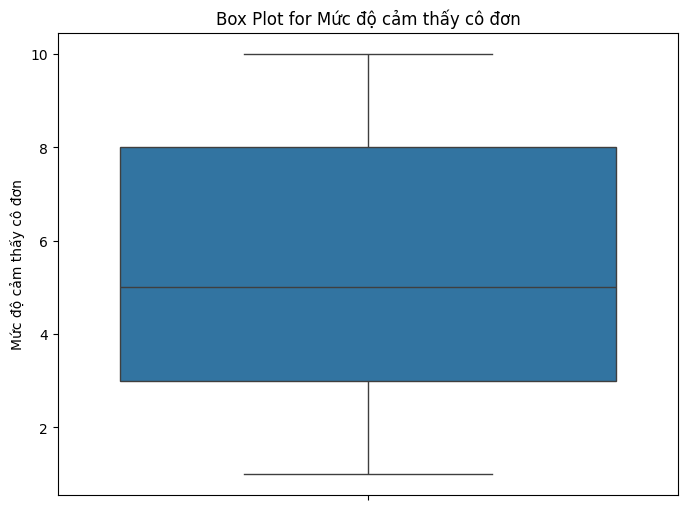

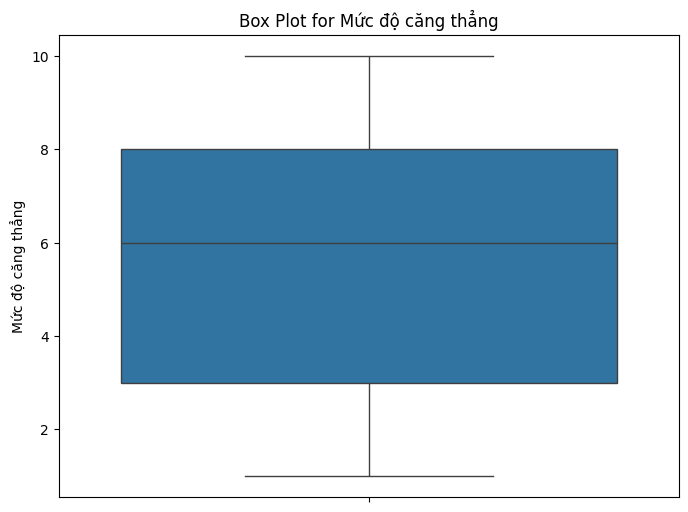

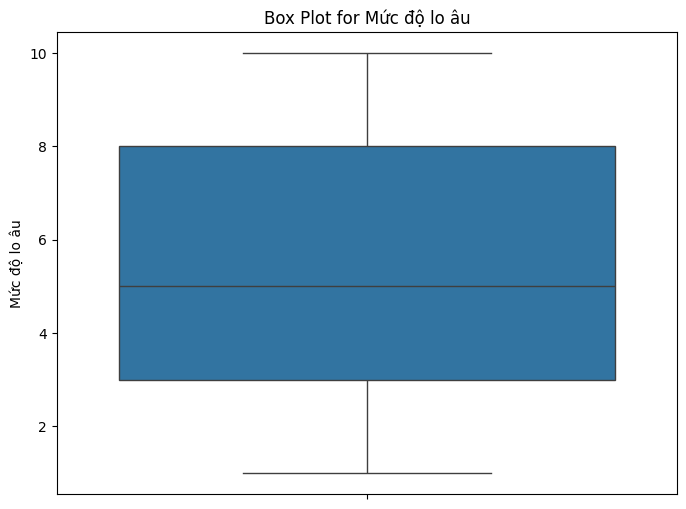

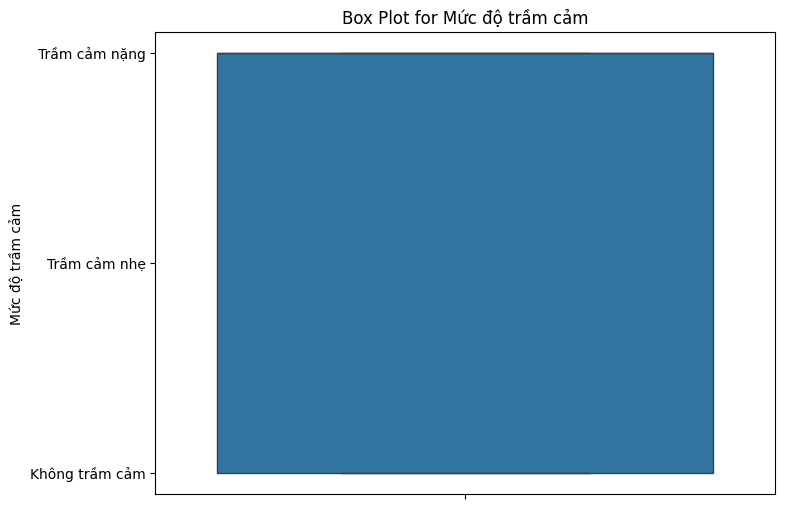

In [34]:
def plot_all_boxplots(df):

    numeric_columns = df.select_dtypes(include=["number"]).columns
    
    
    for column in selected_features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=df[column])
        plt.title(f"Box Plot for {column}")
        plt.ylabel(column)
        plt.show()




plot_all_boxplots(df)

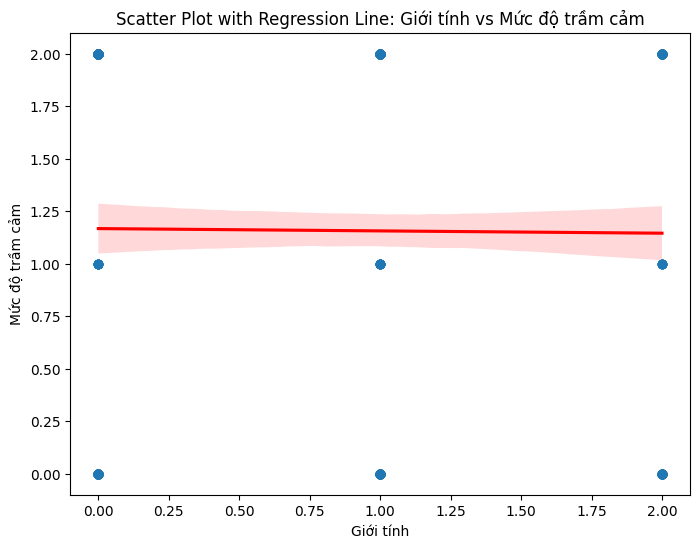

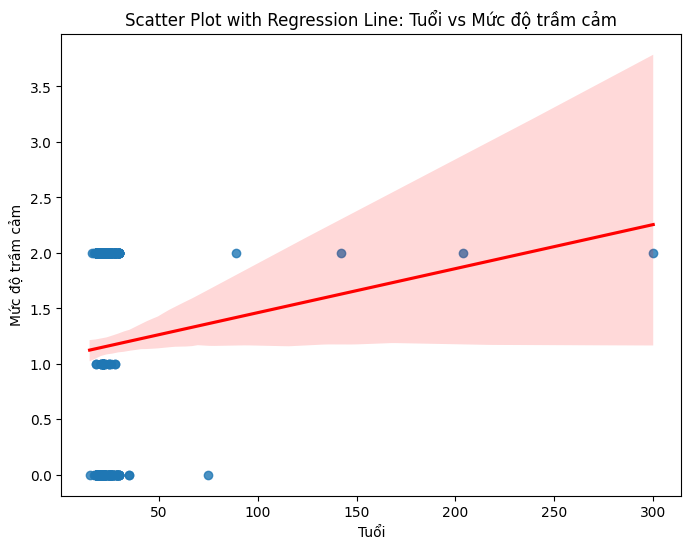

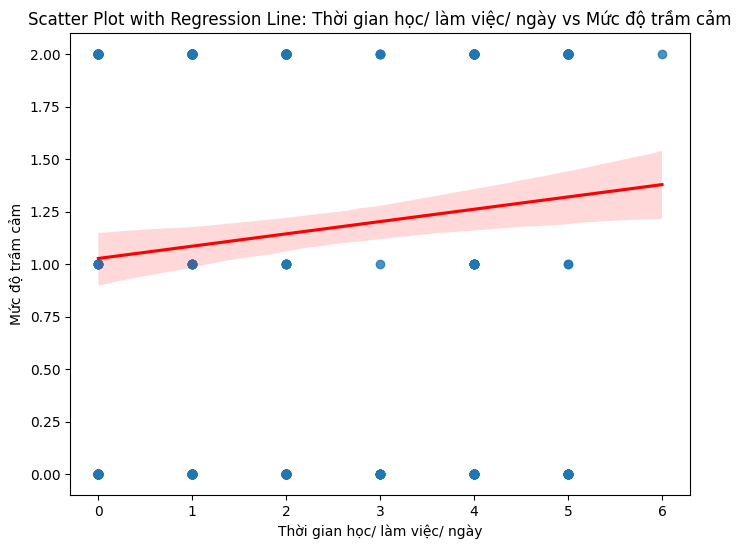

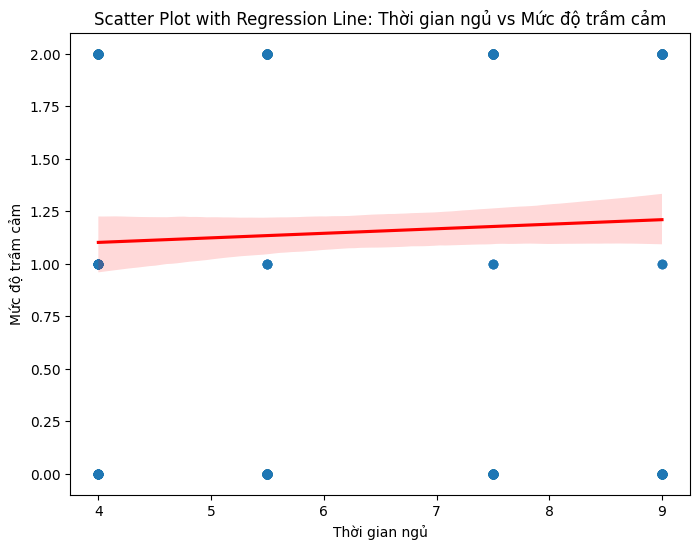

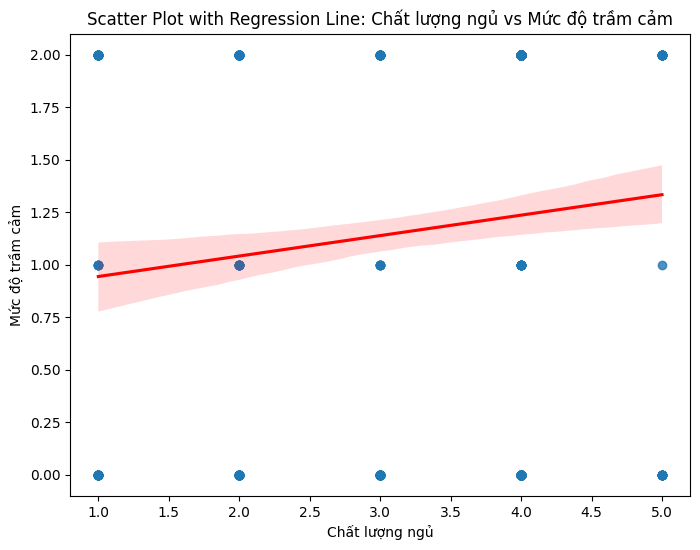

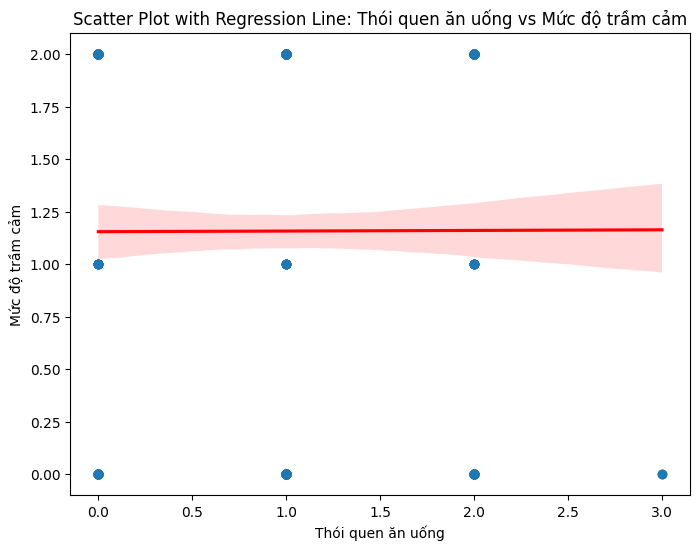

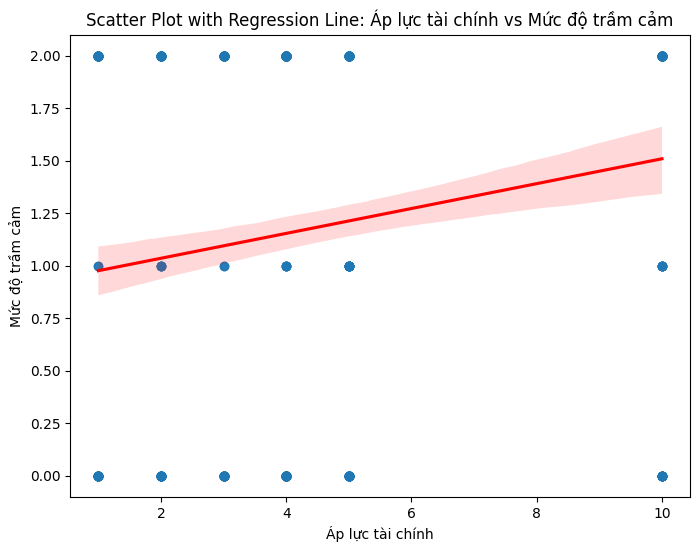

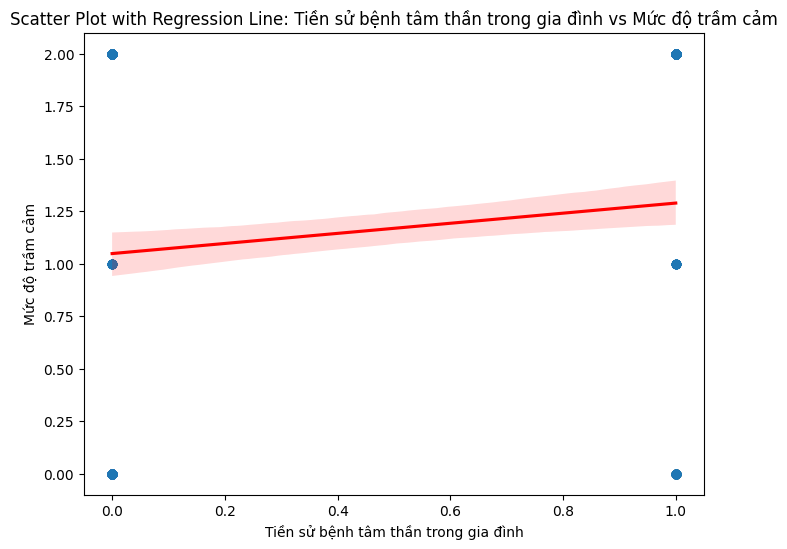

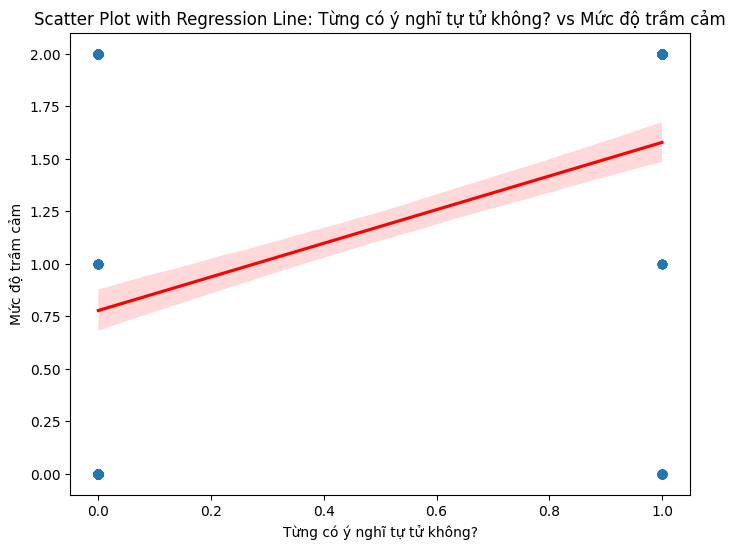

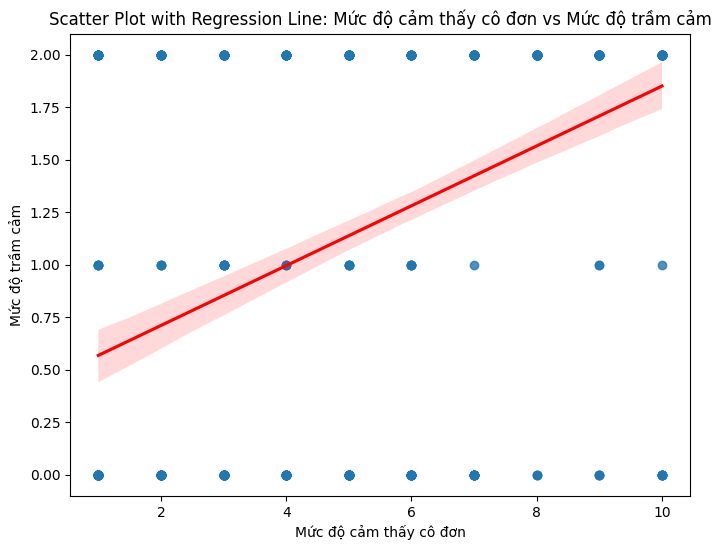

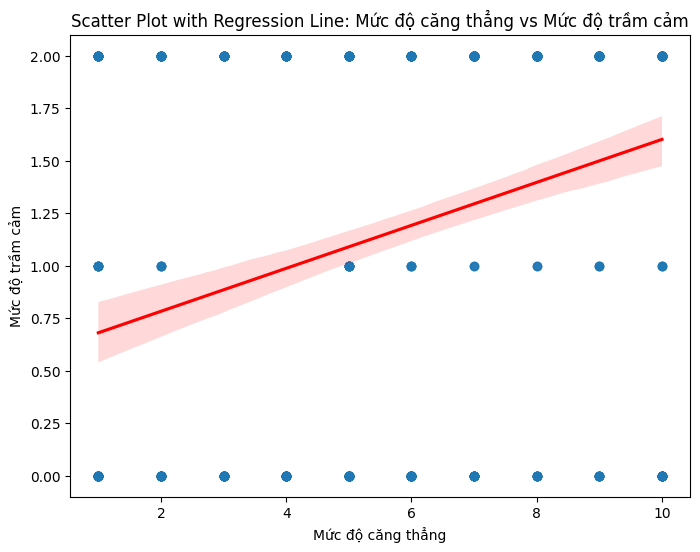

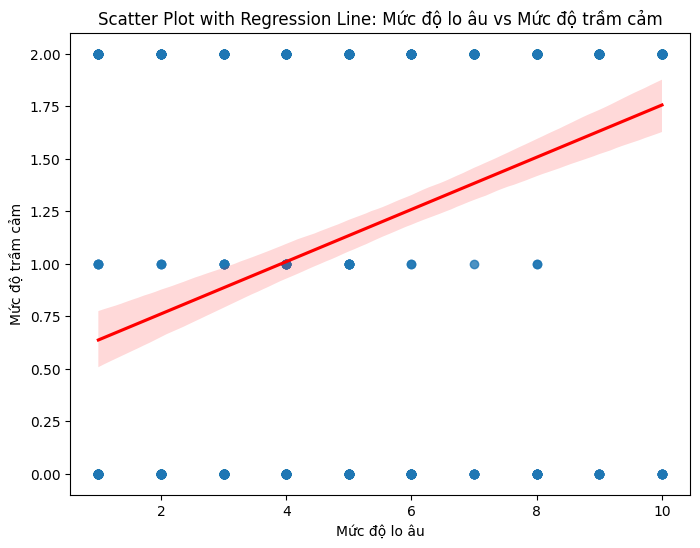

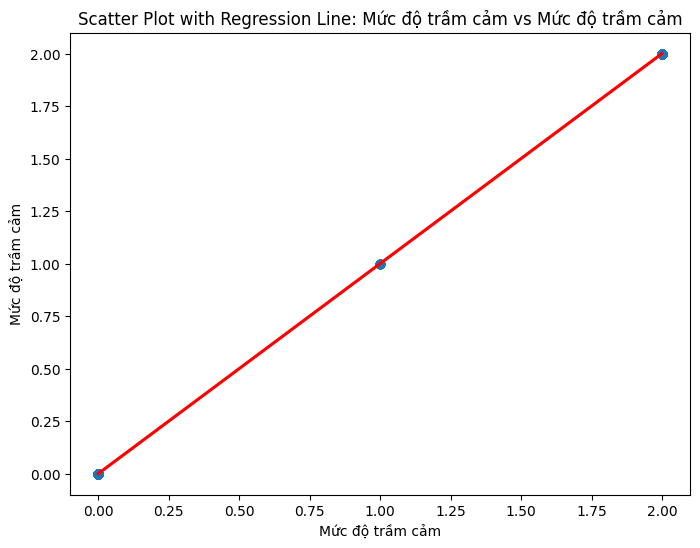

In [35]:
def scatter_with_regression(df_encode):
    df_encode = df_encode.apply(pd.to_numeric, errors="coerce")
    for column in selected_features:
        plt.figure(figsize=(8, 6))
        sns.regplot(x=column, y="Mức độ trầm cảm", data=df_encode, line_kws={"color": "red"})
        plt.title(f"Scatter Plot with Regression Line: {column} vs Mức độ trầm cảm")
        plt.xlabel(column)
        plt.ylabel("Mức độ trầm cảm")
        plt.show()

scatter_with_regression(df_encode)